# Water Project

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
import os
os.getcwd()

'C:\\Users\\Dheerajsuda'

DATA ANALYSIS - TRAIN

In [3]:
train_data=pd.read_csv("waterpoint_traindata.csv")

In [4]:
train_data

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,hand pump,basin3,village8556,region4,15,ward500,3,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,0
1,21324,500.0,857,communal standpipe multiple,basin7,village7372,region5,10,ward1800,5,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,0
2,74,0.0,0,communal standpipe,basin1,village9460,region6,17,ward883,3,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,0
3,74038,0.0,0,other,basin5,village13878,region13,18,ward1505,7,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,0
4,29929,0.0,0,hand pump,basin4,village5192,region6,14,ward942,4,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44063,33555,0.0,0,improved spring,basin5,village16282,region13,18,ward1422,2,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,1
44064,17775,0.0,618,hand pump,basin8,village10061,region5,10,ward2060,1,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,0
44065,34200,0.0,1582,communal standpipe,basin7,village9791,region12,11,ward1897,4,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,0
44066,17012,200.0,629,communal standpipe,basin6,village12243,region15,3,ward1248,3,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,1


In [5]:
train_data.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
0,56421,0.0,1555,hand pump,basin3,village8556,region4,15,ward500,3,...,never pay,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,0
1,21324,500.0,857,communal standpipe multiple,basin7,village7372,region5,10,ward1800,5,...,monthly,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,0
2,74,0.0,0,communal standpipe,basin1,village9460,region6,17,ward883,3,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,0
3,74038,0.0,0,other,basin5,village13878,region13,18,ward1505,7,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,other,0
4,29929,0.0,0,hand pump,basin4,village5192,region6,14,ward942,4,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,1


In [6]:
train_data.shape

(44068, 34)

In [7]:
train_data.tail()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group,Status
44063,33555,0.0,0,improved spring,basin5,village16282,region13,18,ward1422,2,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,improved spring,1
44064,17775,0.0,618,hand pump,basin8,village10061,region5,10,ward2060,1,...,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,0
44065,34200,0.0,1582,communal standpipe,basin7,village9791,region12,11,ward1897,4,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,0
44066,17012,200.0,629,communal standpipe,basin6,village12243,region15,3,ward1248,3,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,1
44067,28533,0.0,1512,hand pump,basin1,village2454,region7,13,ward1948,4,...,never pay,soft,good,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,0


In [8]:
train_data.describe(include="all").T #to describe the whole data 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,44068,NaN,NaN,NaN,37092.5,21490.9,0,18363.2,37021.5,55685.2,74242
Amount_of_water,44068,NaN,NaN,NaN,329.782,3127.6,0,0,0,20,350000
Gps_height,44068,NaN,NaN,NaN,674.305,698.063,-63,0,370,1327,2628
Waterpoint_type,44068,7,communal standpipe,21085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Basin_name,44068,9,basin5,7397,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Village,44068,16471,village18166,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Regionname,44068,21,region12,4190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_code,44068,NaN,NaN,NaN,15.2245,17.5667,1,5,12,17,99
Wardname,44068,2087,ward1290,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District_code,44068,NaN,NaN,NaN,5.66438,9.67061,0,2,3,5,80


In [9]:
train_data.nunique() #unique values

Id                       44068
Amount_of_water             91
Gps_height                2389
Waterpoint_type              7
Basin_name                   9
Village                  16471
Regionname                  21
Region_code                 27
Wardname                  2087
District_code               20
Population                 955
Public_meeting               2
Organization_funding      2380
Organization_surveyed        1
Scheme_management           12
SchemeName                2505
Permit                       2
Company_installed         1873
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

In [10]:
train_data['Region_code'].value_counts() #df['a'].value_counts()

11    4193
17    3456
12    3357
3     3218
5     3010
18    2397
2     2290
19    2283
10    1984
4     1949
16    1766
1     1572
13    1570
14    1551
20    1548
15    1357
6     1288
21    1172
80     916
60     803
90     647
7      646
99     322
9      288
24     257
8      227
40       1
Name: Region_code, dtype: int64

In [11]:
train_data.isnull().sum()

Id                           0
Amount_of_water              0
Gps_height                   0
Waterpoint_type              0
Basin_name                   0
Village                      0
Regionname                   0
Region_code                  0
Wardname                     0
District_code                0
Population                   0
Public_meeting            2525
Organization_funding      2600
Organization_surveyed        0
Scheme_management         2930
SchemeName               20951
Permit                    2227
Company_installed         2603
Management                   0
Management_group             0
Extraction_type              0
Extraction_type_group        0
Extraction_type_class        0
Payment                      0
Payment_type                 0
Water_quality                0
Quality_group                0
Quantity                     0
Quantity_group               0
Source                       0
Source_type                  0
Source_class                 0
Waterpoi

In [12]:
train_data.columns

Index(['Id', 'Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Village', 'Regionname', 'Region_code', 'Wardname', 'District_code',
       'Population', 'Public_meeting', 'Organization_funding',
       'Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group', 'Status'],
      dtype='object')

In [13]:
train_data.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting            object
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                    object
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_typ

In [14]:
train_data.Region_code=train_data.Region_code.astype('category') #convert to category

In [15]:
categorical=train_data.select_dtypes(include='object').columns #convert object to category
train_data[categorical]=train_data[categorical].astype('category')

In [16]:
categorical

Index(['Waterpoint_type', 'Basin_name', 'Village', 'Regionname', 'Wardname',
       'Public_meeting', 'Organization_funding', 'Organization_surveyed',
       'Scheme_management', 'SchemeName', 'Permit', 'Company_installed',
       'Management', 'Management_group', 'Extraction_type',
       'Extraction_type_group', 'Extraction_type_class', 'Payment',
       'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group'],
      dtype='object')

In [17]:
train_data.dtypes

Id                          int64
Amount_of_water           float64
Gps_height                  int64
Waterpoint_type          category
Basin_name               category
Village                  category
Regionname               category
Region_code              category
Wardname                 category
District_code               int64
Population                  int64
Public_meeting           category
Organization_funding     category
Organization_surveyed    category
Scheme_management        category
SchemeName               category
Permit                   category
Company_installed        category
Management               category
Management_group         category
Extraction_type          category
Extraction_type_group    category
Extraction_type_class    category
Payment                  category
Payment_type             category
Water_quality            category
Quality_group            category
Quantity                 category
Quantity_group           category
Source        

In [18]:
train_data.District_code=train_data.District_code.astype('category') #convert to category

In [19]:
train_data.Status=train_data.Status.astype('category') #convert to category

In [20]:
train_data.dtypes

Id                          int64
Amount_of_water           float64
Gps_height                  int64
Waterpoint_type          category
Basin_name               category
Village                  category
Regionname               category
Region_code              category
Wardname                 category
District_code            category
Population                  int64
Public_meeting           category
Organization_funding     category
Organization_surveyed    category
Scheme_management        category
SchemeName               category
Permit                   category
Company_installed        category
Management               category
Management_group         category
Extraction_type          category
Extraction_type_group    category
Extraction_type_class    category
Payment                  category
Payment_type             category
Water_quality            category
Quality_group            category
Quantity                 category
Quantity_group           category
Source        

CORRELATION

HEATMAP - numerical to numerical. comes under correlation

<IPython.core.display.Javascript object>


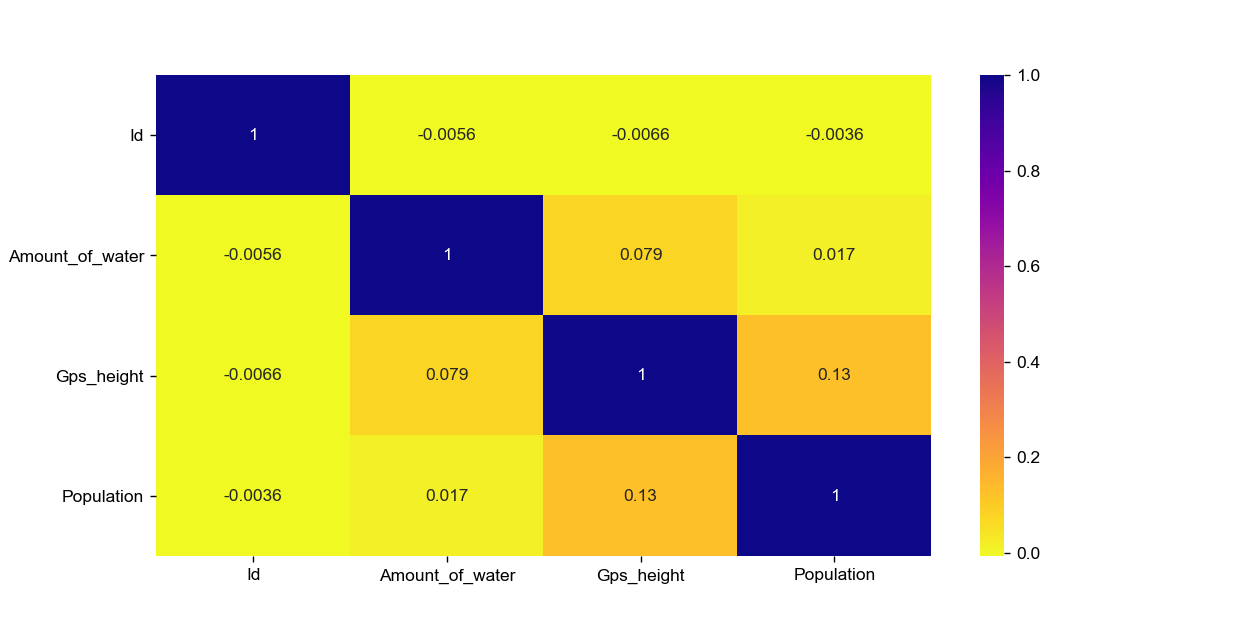

<AxesSubplot:>

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr(), annot= True, cmap="plasma_r")

CHI SQUARE TEST - categorical to categorical. comes under correlation.

In [22]:
from scipy.stats import chi2_contingency
import scipy.stats
from scipy.stats import chi2

In [23]:
cat_col=train_data.select_dtypes(['category']).columns
cat_col

Index(['Waterpoint_type', 'Basin_name', 'Village', 'Regionname', 'Region_code',
       'Wardname', 'District_code', 'Public_meeting', 'Organization_funding',
       'Organization_surveyed', 'Scheme_management', 'SchemeName', 'Permit',
       'Company_installed', 'Management', 'Management_group',
       'Extraction_type', 'Extraction_type_group', 'Extraction_type_class',
       'Payment', 'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group', 'Status'],
      dtype='object')

In [24]:
for i in cat_col:
    #cross tabulation between gender nd approval of loan
    CrosstabResult=pd.crosstab(index=train_data[i],columns=train_data['Status'])
    #performing CHI Test
    ChiSqResult=chi2_contingency(CrosstabResult)
    
    #p-value is probability of H0 being true
    #if p-value >0.05 then only we accept the assumption(H0)
    #H0: The variable are not correlated with each other.
    
    print(i, 'The P-Value of the Chisq Test is:',ChiSqResult[1])

Waterpoint_type The P-Value of the Chisq Test is: 0.0
Basin_name The P-Value of the Chisq Test is: 1.2736522546166646e-234
Village The P-Value of the Chisq Test is: 4.0524244531710534e-237
Regionname The P-Value of the Chisq Test is: 0.0
Region_code The P-Value of the Chisq Test is: 0.0
Wardname The P-Value of the Chisq Test is: 0.0
District_code The P-Value of the Chisq Test is: 1.6833571914833e-207
Public_meeting The P-Value of the Chisq Test is: 3.350366681824802e-52
Organization_funding The P-Value of the Chisq Test is: 0.0
Organization_surveyed The P-Value of the Chisq Test is: 1.0
Scheme_management The P-Value of the Chisq Test is: 6.994778805304023e-193
SchemeName The P-Value of the Chisq Test is: 0.0
Permit The P-Value of the Chisq Test is: 3.190959586262178e-11
Company_installed The P-Value of the Chisq Test is: 0.0
Management The P-Value of the Chisq Test is: 5.106792117430351e-298
Management_group The P-Value of the Chisq Test is: 1.7731279301124172e-22
Extraction_type The P

PLOTTING TECHNIQUES

BOXPLOT

<IPython.core.display.Javascript object>


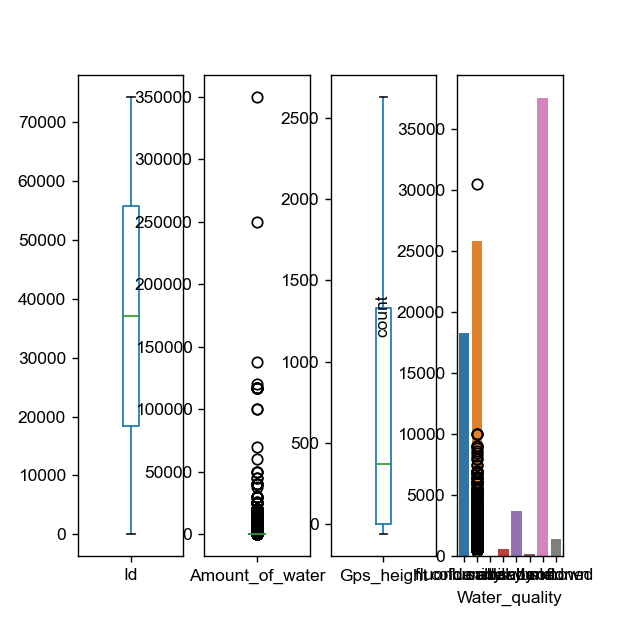

In [25]:
#to check outliers
train_data.plot(kind='box', subplots=True, sharex=False, sharey= False, figsize=(5,5))
plt.show()

In [26]:
sns.countplot(x ='Status', data = train_data)
 
# Show the plot
plt.show()

In [27]:
sns.countplot(x ='Water_quality', data = train_data)
 
# Show the plot
plt.show()

<IPython.core.display.Javascript object>


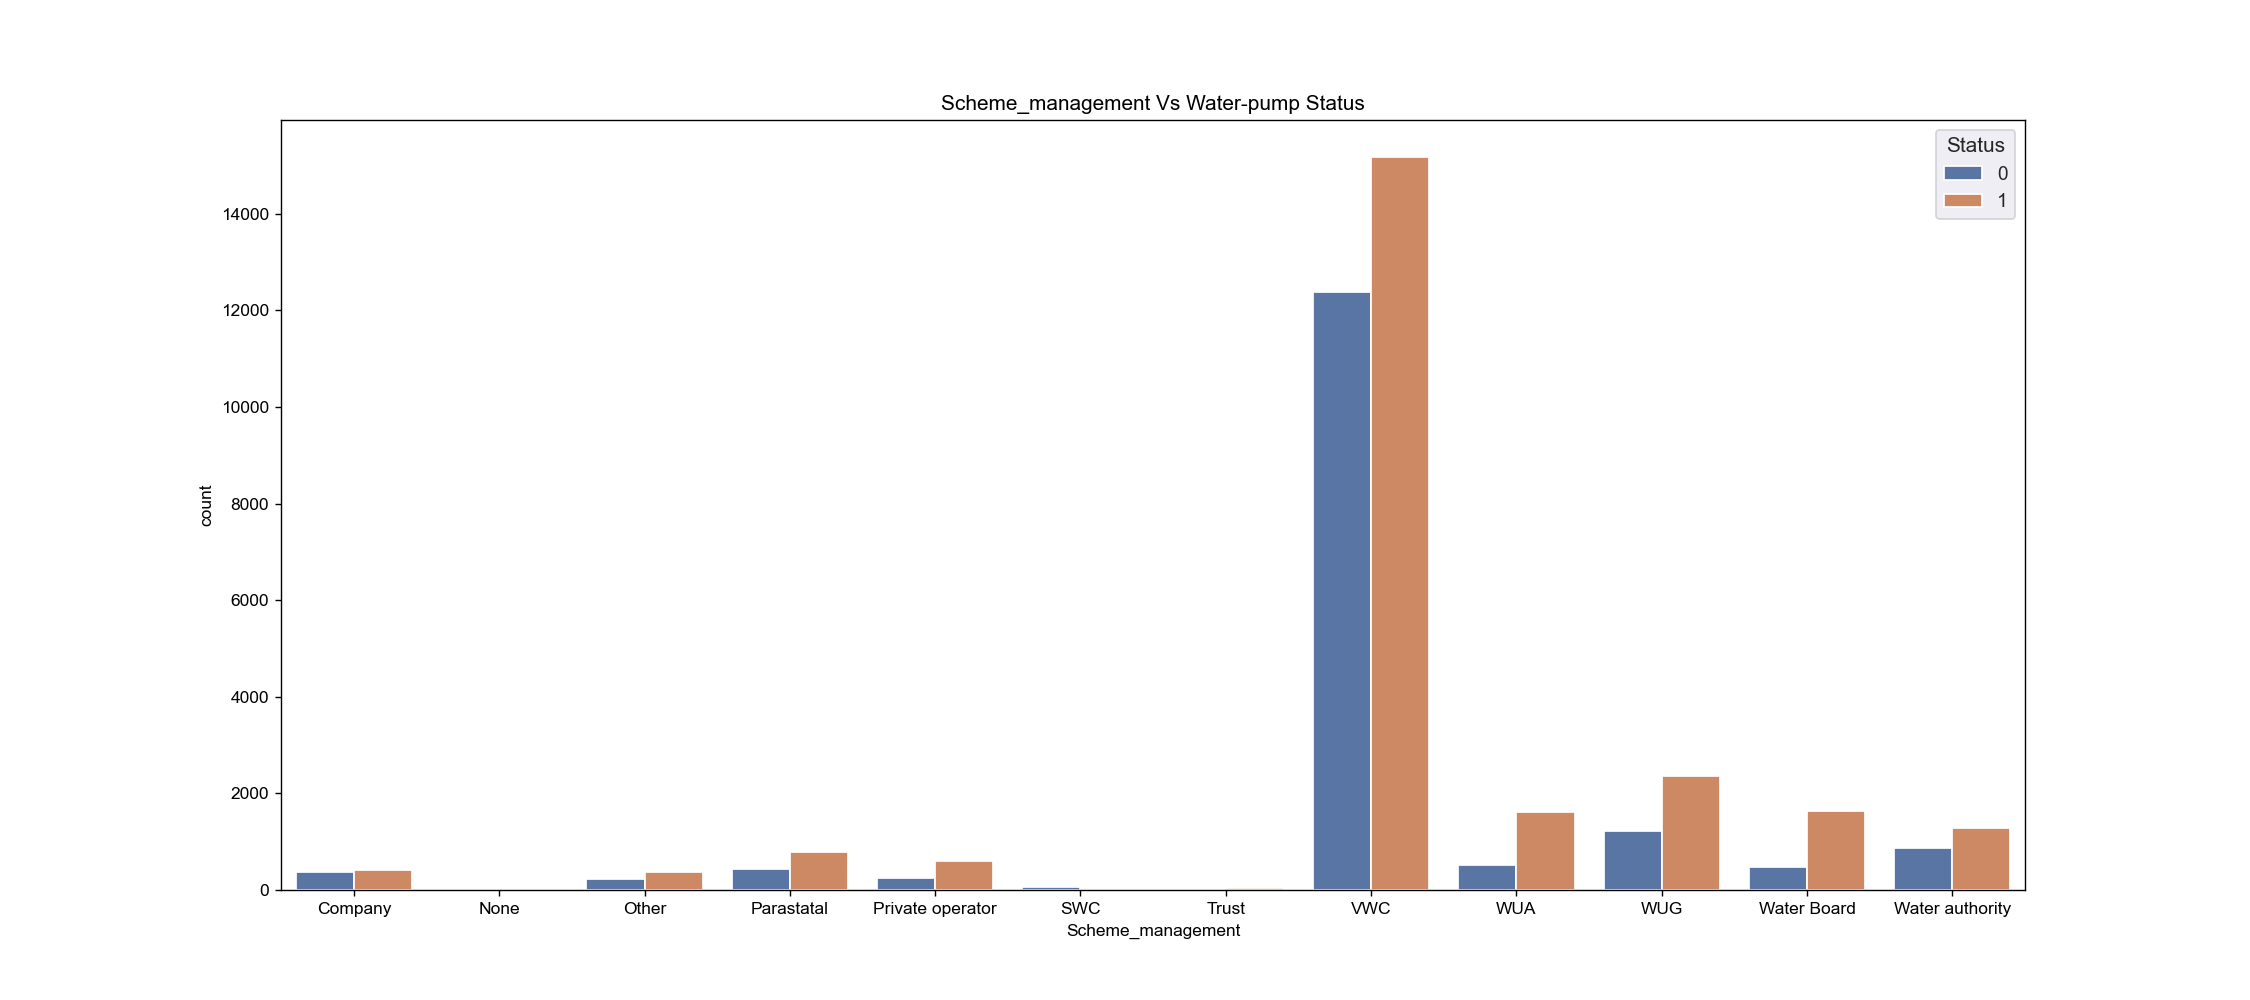

<IPython.core.display.Javascript object>


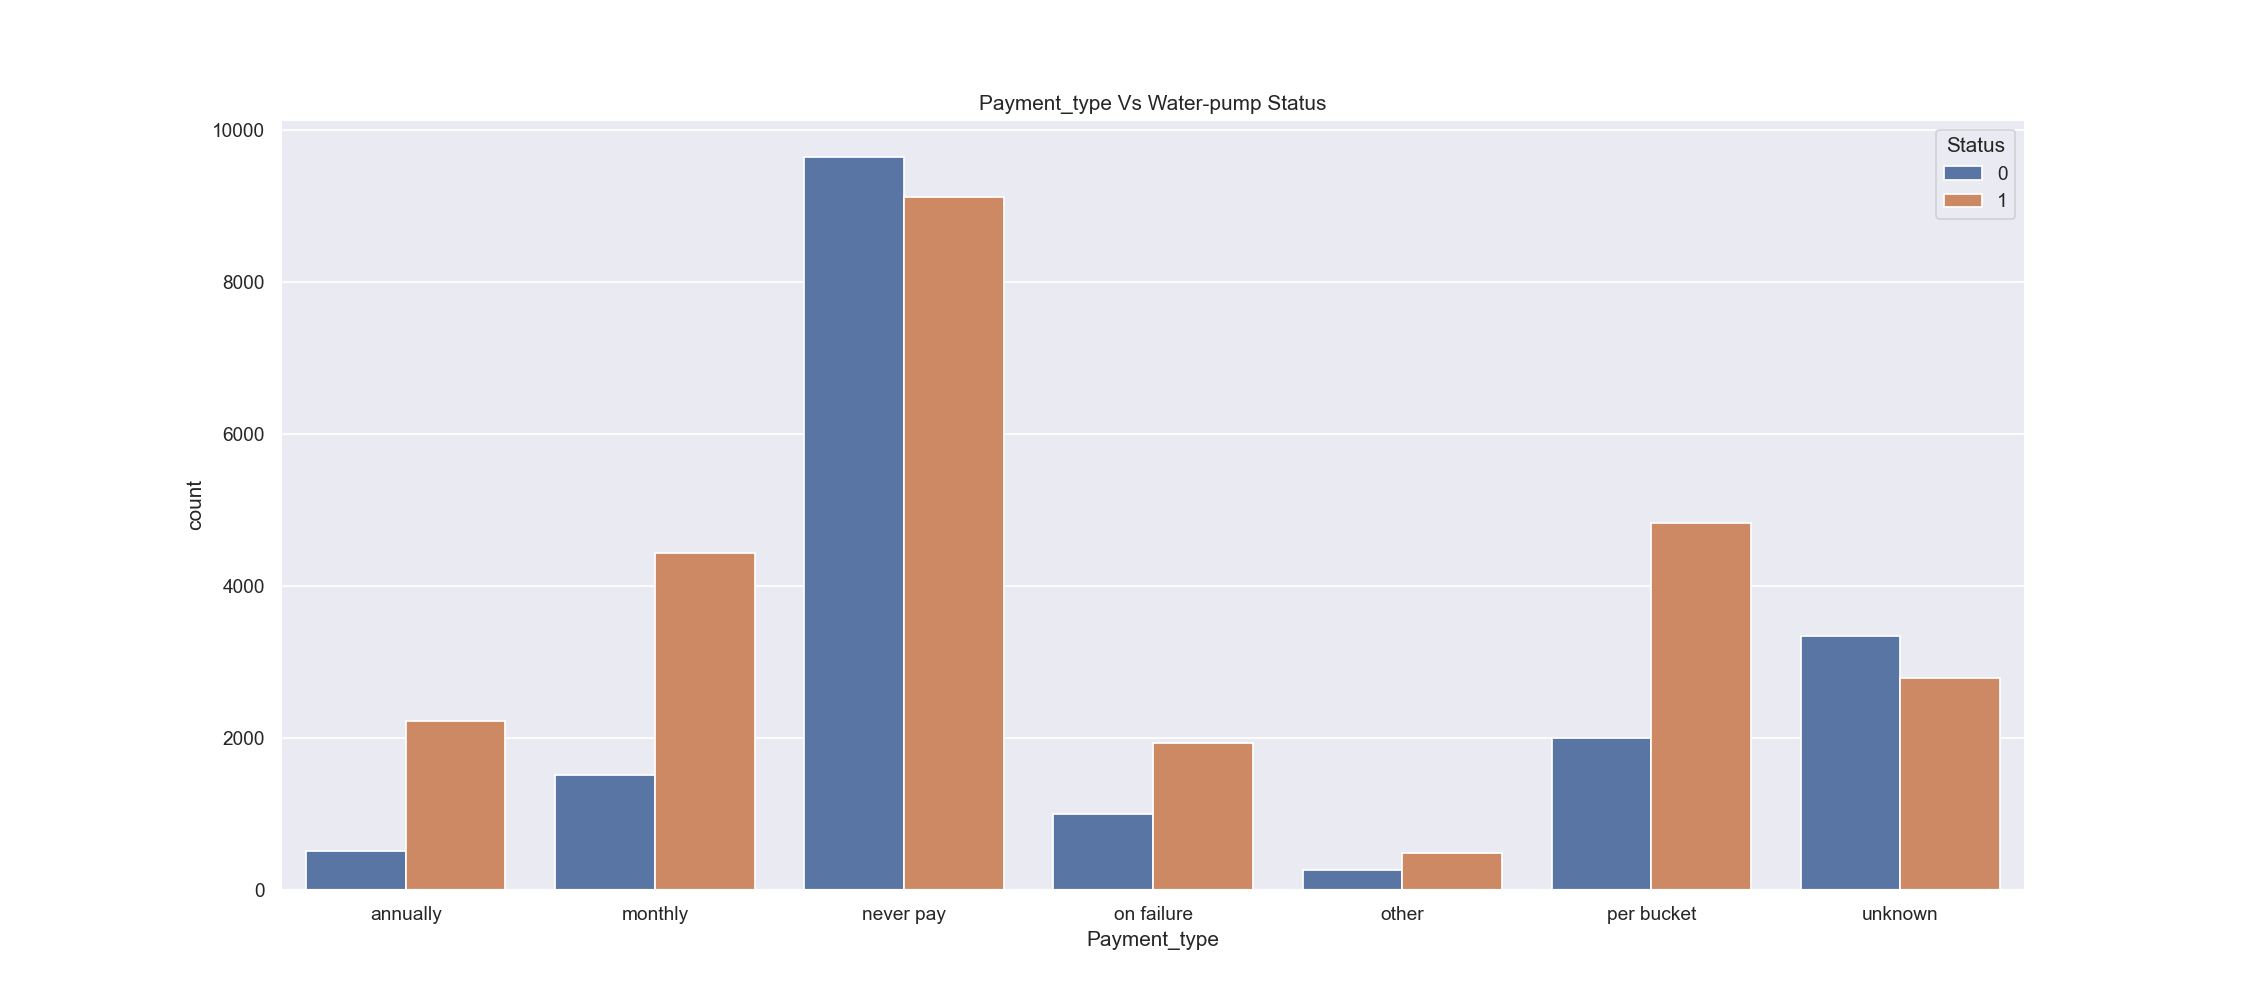

<IPython.core.display.Javascript object>


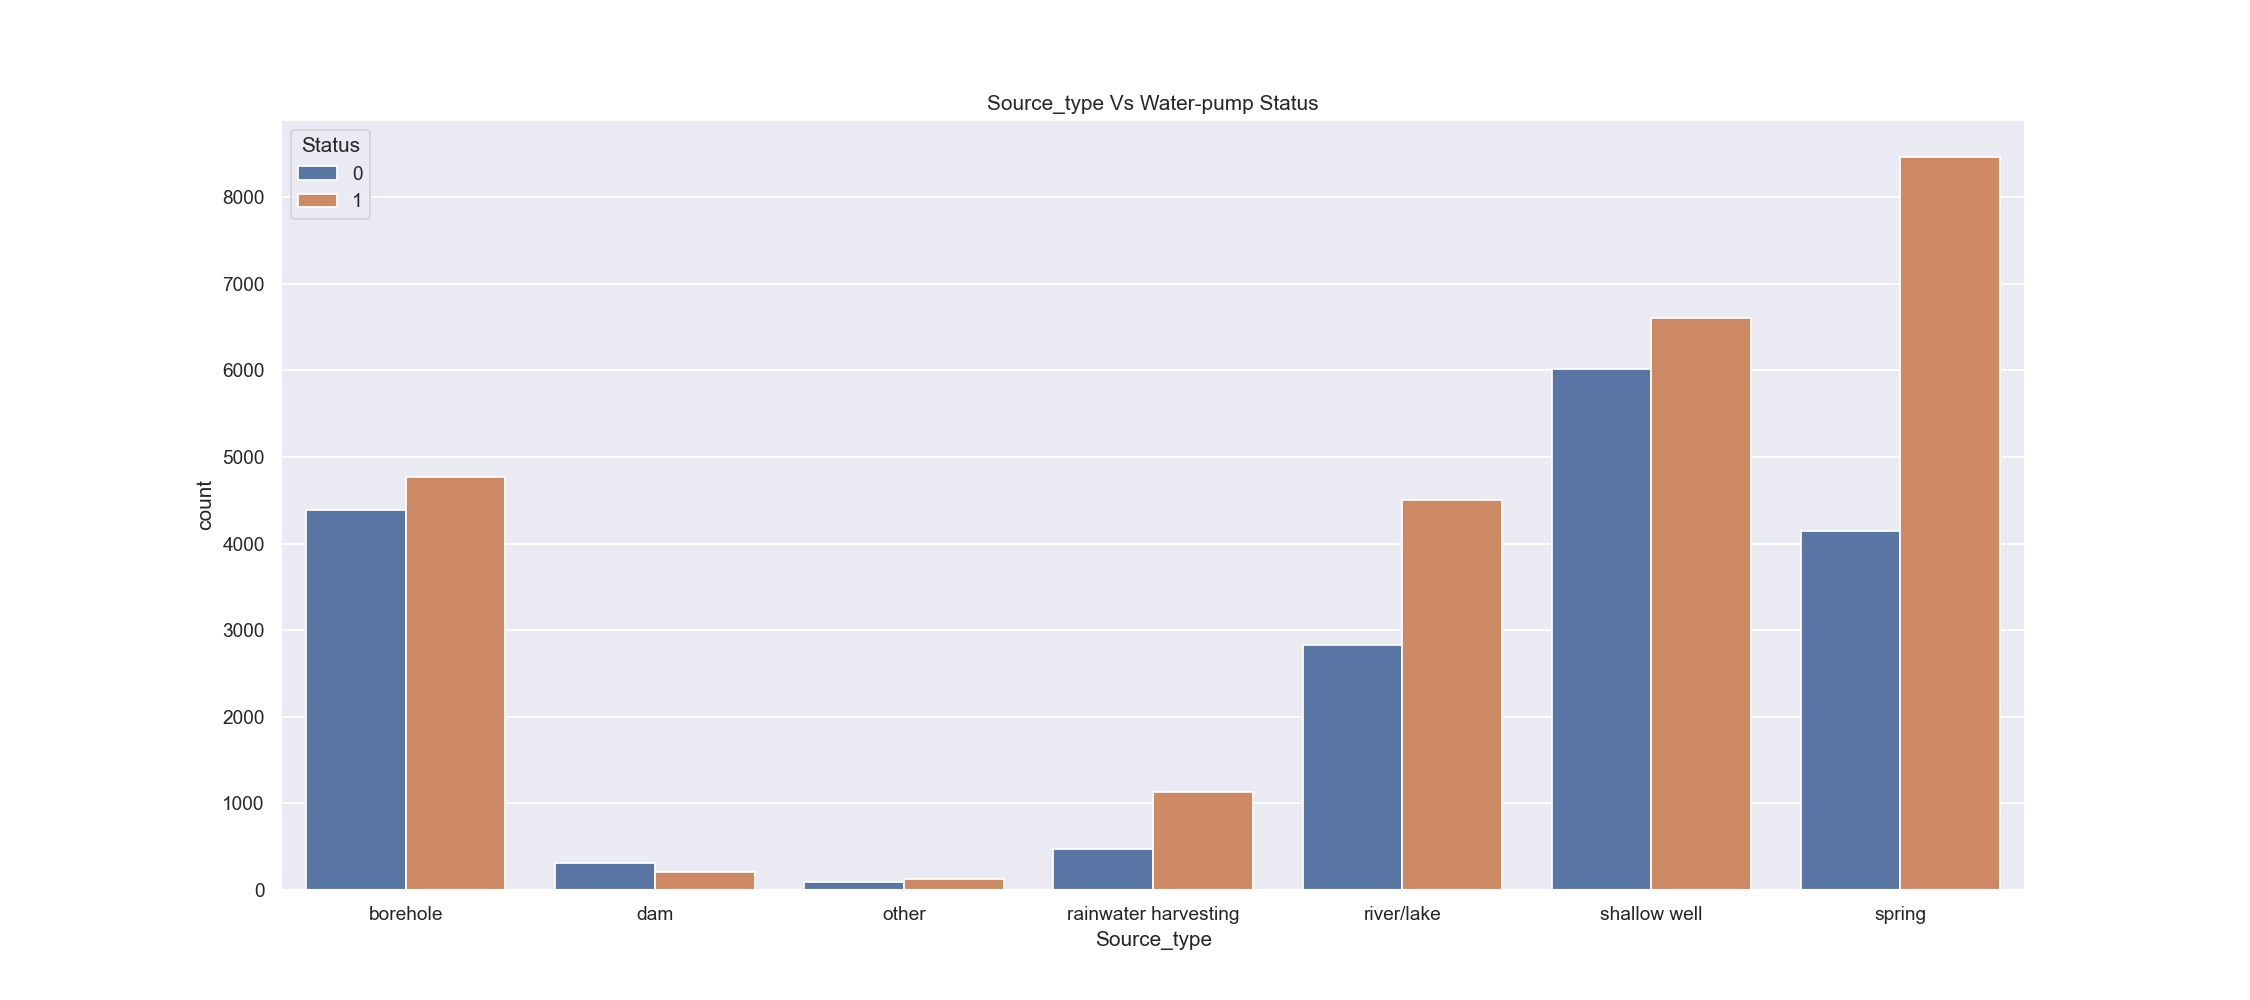

<IPython.core.display.Javascript object>


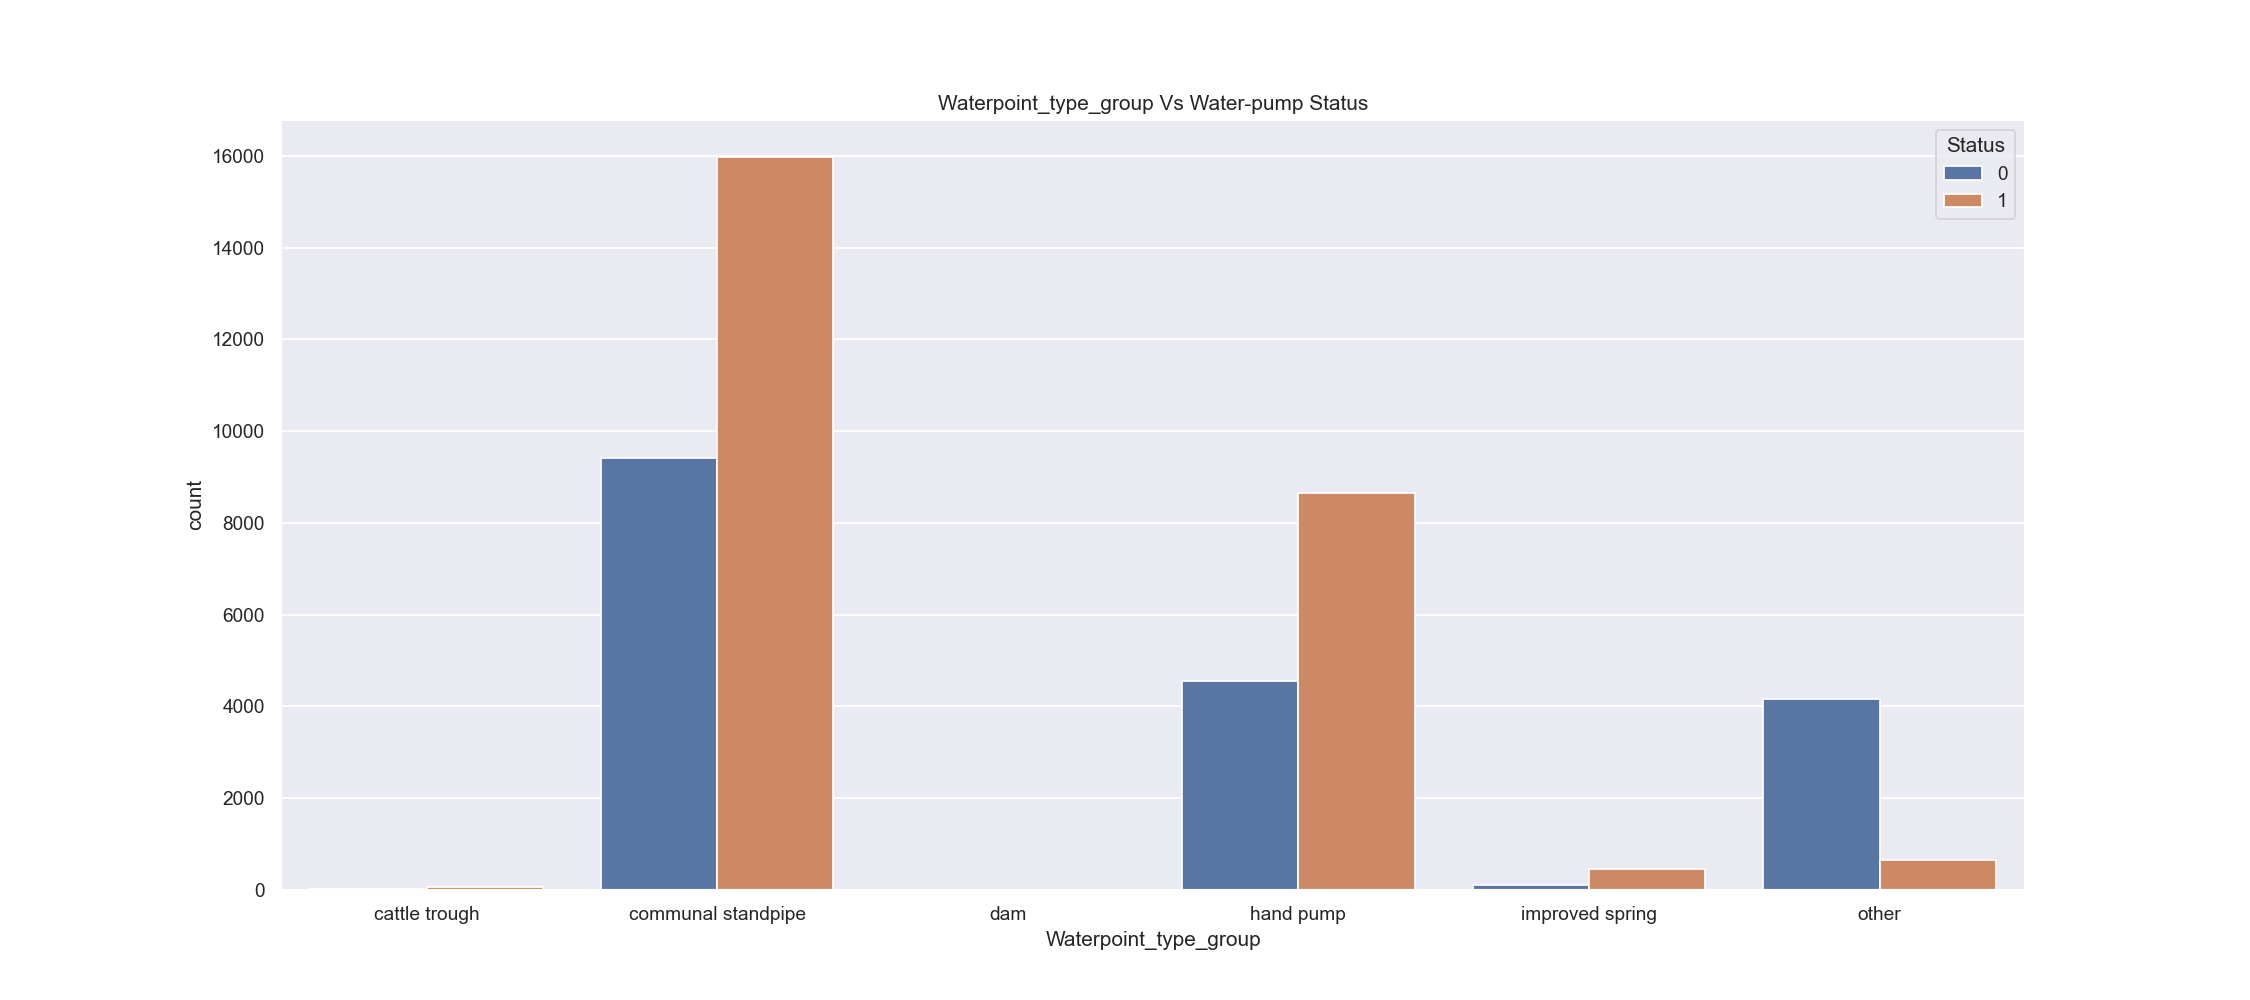

In [28]:
def plot_counts(featureX):
    plt.subplots(figsize=(18,8))
    sns.set(font_scale=1)
    sns.countplot(x=train_data[featureX], hue=train_data['Status'])
    plt.title(f'{featureX} Vs Water-pump Status')
    plt.show()
    return

# Management of Waterpoint
plot_counts('Scheme_management')

# Payment Type of Waterpoint
plot_counts('Payment_type')

# Water source of Waterpoint
plot_counts('Source_type')

# Water source of Waterpoint
plot_counts('Waterpoint_type_group')

<IPython.core.display.Javascript object>


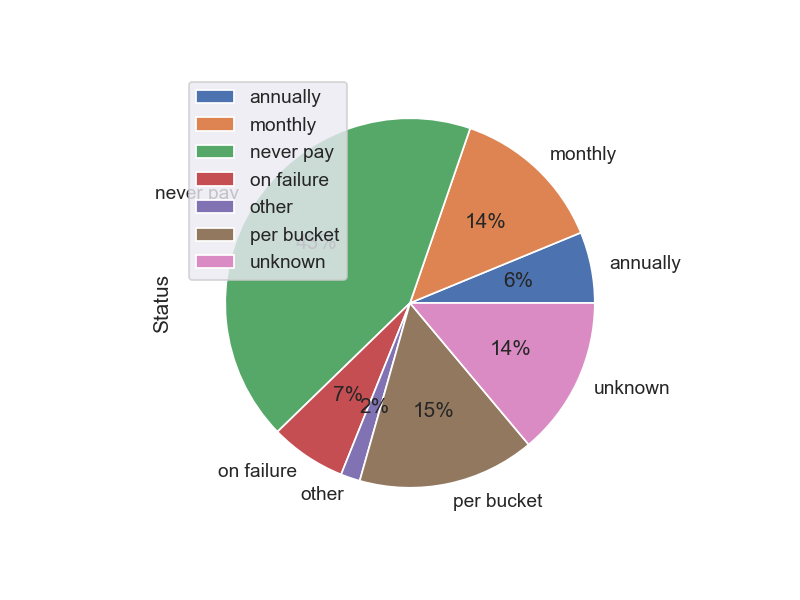

<AxesSubplot:ylabel='Status'>

In [29]:
train_data.groupby(['Payment_type']).count().plot(kind='pie' , y='Status',autopct='%1.0f%%')

IMPUTATION

#if the null values are in numerical we will take either "Mean","Mediun" and if the mean and 50% in describe is same we will take "Mean" if not we will take "Mediun" and for the categorical we will take "Mode" to replace(impute).

In [30]:
cat_imp = SimpleImputer(strategy='most_frequent') #imputing the categorical values to mode or most_frequency.
train_data[categorical]=cat_imp.fit_transform(train_data[categorical])

In [31]:
train_data.isnull().sum()

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
Status                   0
dtype: int64

DROP

In [32]:
train_data=train_data.drop(['Village','Id','Company_installed','Region_code','SchemeName','Wardname','Extraction_type','Payment','Quantity_group','Source','Organization_surveyed','Organization_funding'],axis=1)

SPLIT

In [33]:
#dropping the target variable from train data and storing the rest of the attributes in "X" and target attribute in "Y"
x=train_data.drop(["Status"],axis=1)
#storing the target variable in "Y"
y=train_data["Status"]

In [34]:
x.dtypes

Amount_of_water           float64
Gps_height                  int64
Waterpoint_type            object
Basin_name                 object
Regionname                 object
District_code            category
Population                  int64
Public_meeting               bool
Scheme_management          object
Permit                       bool
Management                 object
Management_group           object
Extraction_type_group      object
Extraction_type_class      object
Payment_type               object
Water_quality              object
Quality_group              object
Quantity                   object
Source_type                object
Source_class               object
Waterpoint_type_group      object
dtype: object

In [35]:
x.shape

(44068, 21)

In [36]:
y.shape

(44068,)

In [37]:
#to know the values in Status
train_data["Status"].value_counts()

1    25808
0    18260
Name: Status, dtype: int64

In [38]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)

In [39]:
# categorical=x_train.select_dtypes(include='object').columns #convert object to category
# x_train[categorical]=x_train[categorical].astype('category')
# categorical

In [40]:
num_col=train_data.select_dtypes(['float64','int64']).columns
num_col

Index(['Amount_of_water', 'Gps_height', 'Population'], dtype='object')

In [41]:
categorical=x_train.select_dtypes(include='object').columns #convert object to category
x_train[categorical]=x_train[categorical].astype('category')

C:\Users\Dheerajsuda\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cat_col=x_train.select_dtypes(['category']).columns
cat_col

Index(['Waterpoint_type', 'Basin_name', 'Regionname', 'District_code',
       'Scheme_management', 'Management', 'Management_group',
       'Extraction_type_group', 'Extraction_type_class', 'Payment_type',
       'Water_quality', 'Quality_group', 'Quantity', 'Source_type',
       'Source_class', 'Waterpoint_type_group'],
      dtype='object')

Check the whole data and decide to do either nominal data - one hot encoding or ordinal data - label encode

STANDARD SCALING - In data there are diff values by using scaling we can set the data values in a range 

In [43]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [44]:
scaler=StandardScaler() 
scaler.fit(x_train[num_col])

StandardScaler()

In [45]:
x_train_num=pd.DataFrame(scaler.transform(x_train[num_col]),columns=num_col)
x_test_num =pd.DataFrame(scaler.transform(x_test[num_col]),columns=num_col)

In [46]:
x_test_num

,Amount_of_water,Gps_height,Population
0,-0.097706,-0.778356,-0.400624
1,-0.097706,1.345442,0.730045
2,-0.097706,-0.216217,0.412823
3,-0.097706,1.510356,0.050284
4,-0.097706,1.240758,-0.400624
...,...,...,...
13216,0.192283,2.098308,-0.368902
13217,-0.091906,-0.553214,0.390164
13218,-0.039708,-0.180366,-0.400624
13219,-0.083206,-0.862964,-0.042616


ONE-HOT ENCODING

In [47]:
ohe =OneHotEncoder(handle_unknown='ignore') #onehotencoding
ohe.fit(x_train[cat_col])
columns_ohe=list(ohe.get_feature_names(cat_col))

In [48]:
cat_col

Index(['Waterpoint_type', 'Basin_name', 'Regionname', 'District_code',
       'Scheme_management', 'Management', 'Management_group',
       'Extraction_type_group', 'Extraction_type_class', 'Payment_type',
       'Water_quality', 'Quality_group', 'Quantity', 'Source_type',
       'Source_class', 'Waterpoint_type_group'],
      dtype='object')

In [49]:
print(columns_ohe)

['Waterpoint_type_cattle trough', 'Waterpoint_type_communal standpipe', 'Waterpoint_type_communal standpipe multiple', 'Waterpoint_type_dam', 'Waterpoint_type_hand pump', 'Waterpoint_type_improved spring', 'Waterpoint_type_other', 'Basin_name_basin1', 'Basin_name_basin2', 'Basin_name_basin3', 'Basin_name_basin4', 'Basin_name_basin5', 'Basin_name_basin6', 'Basin_name_basin7', 'Basin_name_basin8', 'Basin_name_basin9', 'Regionname_region1', 'Regionname_region10', 'Regionname_region11', 'Regionname_region12', 'Regionname_region13', 'Regionname_region14', 'Regionname_region15', 'Regionname_region16', 'Regionname_region17', 'Regionname_region18', 'Regionname_region19', 'Regionname_region2', 'Regionname_region20', 'Regionname_region21', 'Regionname_region3', 'Regionname_region4', 'Regionname_region5', 'Regionname_region6', 'Regionname_region7', 'Regionname_region8', 'Regionname_region9', 'District_code_0', 'District_code_1', 'District_code_2', 'District_code_3', 'District_code_4', 'District_c

In [50]:
x_train_cat=ohe.transform(x_train[cat_col]) #transforming the data it will be converted to arrays
x_test_cat=ohe.transform(x_test[cat_col])

In [51]:
x_train_cat=pd.DataFrame(x_train_cat.todense(),columns=columns_ohe) #converting into DataFrame
x_test_cat=pd.DataFrame(x_test_cat.todense(),columns=columns_ohe)

In [52]:
x_train=pd.concat([x_train_num,x_train_cat],axis=1) #concating the data of test from scaling and here
x_test=pd.concat([x_test_num,x_test_cat],axis=1)

In [53]:
x_train=x_train.drop(['Waterpoint_type_group_dam','Scheme_management_None','Waterpoint_type_dam'],axis=1)

In [54]:
x_test=x_test.drop(['Waterpoint_type_group_dam','Scheme_management_None','Waterpoint_type_dam'],axis=1)

In [55]:
x_test.shape

(13221, 148)

In [56]:
x_train.shape

(30847, 148)

METRICS

In [57]:
from sklearn import metrics
import numpy as np
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = metrics.accuracy_score(train_actual,train_predicted)
    train_recall   = metrics.recall_score(train_actual,train_predicted,average="weighted")
    train_precision= metrics.precision_score(train_actual,train_predicted,average="weighted")
    train_f1score  = metrics.f1_score(train_actual,train_predicted,average="weighted")
    test_accuracy = metrics.accuracy_score(test_actual,test_predicted)
    test_recall   = metrics.recall_score(test_actual,test_predicted,average="weighted")
    test_precision= metrics.precision_score(test_actual,test_predicted,average="weighted")
    test_f1score  = metrics.f1_score(test_actual,test_predicted,average="weighted")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

In [58]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

*******************End of pre processing*****************

MODEL BUILDING

In [59]:
#LOGISTIC REGRESSION
logistic_model=LogisticRegression(solver='liblinear',random_state=1230)
#liblinear is used to stabilize the big data and randomstate is used to store nd fix the data with random values
model=logistic_model.fit(x_train,y_train)

In [60]:
y_train_pred_log=logistic_model.predict(x_train)
y_test_pred_log=logistic_model.predict(x_test)

In [61]:
y_pred=logistic_model.predict(x_test)

CONFUSION MATRIX

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr=confusion_matrix(y_test,y_pred)
print(cmr)

[[3465 2013]
 [ 742 7001]]


In [63]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3465 2013]
 [ 742 7001]]

True Positives(TP) =  3465

True Negatives(TN) =  7001

False Positives(FP) =  2013

False Negatives(FN) =  742


ROC Curve

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7683508151163351

<IPython.core.display.Javascript object>


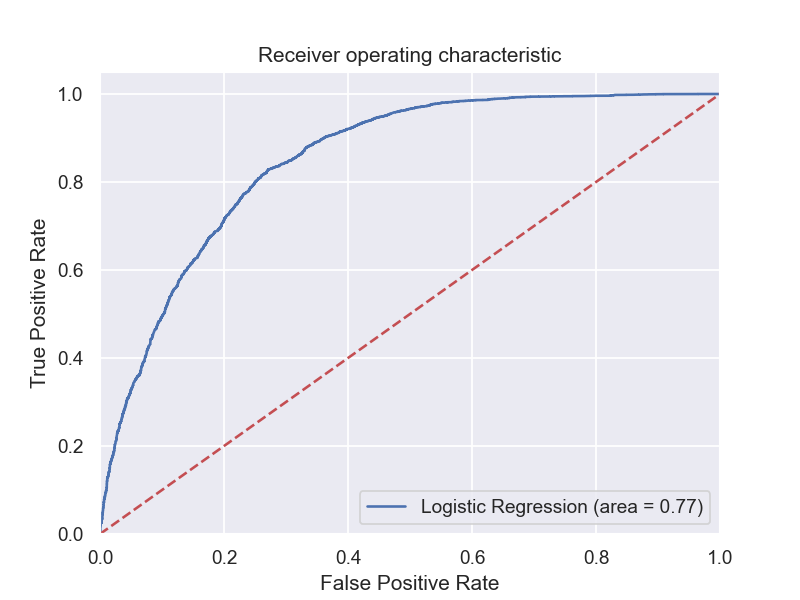

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

CLASSIFICATION REPORT

In [66]:
from sklearn.metrics import classification_report

In [67]:
classifcation_report_train_test(y_train, y_train_pred_log, y_test, y_test_pred_log)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8286    0.6392    0.7217     12782
           1     0.7802    0.9064    0.8386     18065

    accuracy                         0.7957     30847
   macro avg     0.8044    0.7728    0.7801     30847
weighted avg     0.8003    0.7957    0.7902     30847


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8236    0.6325    0.7155      5478
           1     0.7767    0.9042    0.8356      7743

    accuracy                         0.7916     13221
   macro avg     0.8002    0.7684    0.7756     13221
weighted avg     0.7961    0.7916    0.7858     13221



In [68]:
scores=get_metrics(y_train, y_train_pred_log, y_test, y_test_pred_log,"Logistic",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849


DESCISION TREE

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=10) #here we will put the feature values in range 
dt.fit(x_train,y_train) #these will be like probabilty and it is easy to calculate the impurity

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [71]:
dt.feature_importances_

array([5.77208952e-02, 3.79518306e-02, 2.50226162e-02, 0.00000000e+00,
       4.86725718e-04, 3.95848950e-02, 0.00000000e+00, 0.00000000e+00,
       1.77822900e-01, 4.71801958e-03, 1.32631764e-02, 0.00000000e+00,
       8.65780709e-04, 3.95196416e-03, 2.01462989e-03, 1.68537618e-03,
       6.18186239e-04, 9.46512753e-04, 2.49359057e-03, 0.00000000e+00,
       5.87216399e-04, 1.62228963e-02, 4.33830205e-04, 1.59744803e-03,
       3.45333718e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.24003449e-03, 2.13394899e-04, 5.52709973e-04, 2.65746032e-03,
       3.20197261e-04, 6.18663760e-03, 6.81341188e-04, 1.59601233e-02,
       6.43385823e-04, 0.00000000e+00, 1.18513637e-03, 0.00000000e+00,
       2.01591352e-03, 6.50867306e-03, 1.10025238e-02, 2.13332917e-03,
       1.76172149e-03, 6.50673382e-04, 2.88467356e-03, 0.00000000e+00,
       3.27974671e-04, 0.00000000e+00, 1.13824849e-02, 8.89639470e-04,
       2.19345545e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [72]:
feature_scores=pd.Series(dt.feature_importances_ , index=x_train.columns).sort_values(ascending=False)
feature_scores #if the scores are high it effects large in model building

Quantity_dry                                   0.365422
Waterpoint_type_other                          0.177823
Amount_of_water                                0.057721
Waterpoint_type_communal standpipe multiple    0.039585
Gps_height                                     0.037952
                                                 ...   
Extraction_type_group_india mark iii           0.000000
Extraction_type_group_mono                     0.000000
Extraction_type_group_other handpump           0.000000
Extraction_type_group_other motorpump          0.000000
Management_parastatal                          0.000000
Length: 148, dtype: float64

In [73]:
feature_scores = pd.DataFrame({'Feature_names':x_train.columns, 'Importances':dt.feature_importances_})
feature_scores

,Feature_names,Importances
0,Amount_of_water,0.057721
1,Gps_height,0.037952
2,Population,0.025023
3,Waterpoint_type_cattle trough,0.000000
4,Waterpoint_type_communal standpipe,0.000487
...,...,...
143,Waterpoint_type_group_cattle trough,0.000000
144,Waterpoint_type_group_communal standpipe,0.000316
145,Waterpoint_type_group_hand pump,0.000103
146,Waterpoint_type_group_improved spring,0.000000


In [74]:
y_train_pred=dt.predict(x_train)
y_test_pred=dt.predict(x_test)

In [75]:
classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8962    0.5793    0.7037     12782
           1     0.7619    0.9525    0.8466     18065

    accuracy                         0.7978     30847
   macro avg     0.8290    0.7659    0.7751     30847
weighted avg     0.8175    0.7978    0.7874     30847


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8633    0.5593    0.6789      5478
           1     0.7504    0.9374    0.8335      7743

    accuracy                         0.7807     13221
   macro avg     0.8069    0.7483    0.7562     13221
weighted avg     0.7972    0.7807    0.7694     13221



In [76]:
scores=get_metrics(y_train, y_train_pred, y_test, y_test_pred,"DecisionTree",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849
1,DecisionTree,0.797841,0.797841,0.817516,0.787370,0.780728,0.780728,0.797204,0.769443


RANDOM FOREST

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
rf=RandomForestClassifier()

In [79]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [81]:
classifcation_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9647    0.9366    0.9504     12782
           1     0.9560    0.9758    0.9658     18065

    accuracy                         0.9595     30847
   macro avg     0.9604    0.9562    0.9581     30847
weighted avg     0.9596    0.9595    0.9594     30847


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8152    0.7643    0.7890      5478
           1     0.8403    0.8774    0.8585      7743

    accuracy                         0.8306     13221
   macro avg     0.8278    0.8209    0.8237     13221
weighted avg     0.8299    0.8306    0.8297     13221



In [82]:
scores=get_metrics(y_train, y_pred_train, y_test, y_pred_test,"RandomForest",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849
1,DecisionTree,0.797841,0.797841,0.817516,0.787370,0.780728,0.780728,0.797204,0.769443
2,RandomForest,0.959510,0.959510,0.959615,0.959417,0.830573,0.830573,0.829923,0.829673


RandomForest Grid Search

In [83]:
param_grid={"n_estimators":[50, 100],
            "max_depth":[1,15],
            "max_features":[3,5],
            "min_samples_leaf":[1,2,4]}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
clf3=RandomForestClassifier()
clf_grid=GridSearchCV(rf, param_grid, cv=2)

In [86]:
clf_grid.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 15], 'max_features': [3, 5],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]})

In [87]:
clf_grid.best_params_

{'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 50}

In [88]:
pred=clf_grid.predict(x_test)

In [89]:
y_train_predf2=clf_grid.predict(x_train)
y_test_predf2=clf_grid.predict(x_test)

In [90]:
classifcation_report_train_test(y_train, y_train_predf2, y_test, y_test_predf2)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9396    0.6662    0.7796     12782
           1     0.8041    0.9697    0.8792     18065

    accuracy                         0.8439     30847
   macro avg     0.8719    0.8179    0.8294     30847
weighted avg     0.8603    0.8439    0.8379     30847


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8906    0.6241    0.7339      5478
           1     0.7805    0.9458    0.8552      7743

    accuracy                         0.8125     13221
   macro avg     0.8356    0.7849    0.7946     13221
weighted avg     0.8261    0.8125    0.8050     13221



In [91]:
scores=get_metrics(y_train, y_train_predf2, y_test, y_test_predf2,"RandomForest_GSCV",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849
1,DecisionTree,0.797841,0.797841,0.817516,0.787370,0.780728,0.780728,0.797204,0.769443
2,RandomForest,0.959510,0.959510,0.959615,0.959417,0.830573,0.830573,0.829923,0.829673
3,RandomForest_GSCV,0.843939,0.843939,0.860281,0.837935,0.812495,0.812495,0.826139,0.804976


KNN 

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
#KNN N value is 5 by default
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [94]:
y_train_pred_knn=model_knn.predict(x_train)
y_test_pred_knn=model_knn.predict(x_test)

In [95]:
classifcation_report_train_test(y_train, y_train_pred_knn, y_test, y_test_pred_knn)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8704    0.7837    0.8248     12782
           1     0.8570    0.9175    0.8862     18065

    accuracy                         0.8620     30847
   macro avg     0.8637    0.8506    0.8555     30847
weighted avg     0.8626    0.8620    0.8608     30847


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8027    0.7276    0.7633      5478
           1     0.8193    0.8734    0.8455      7743

    accuracy                         0.8130     13221
   macro avg     0.8110    0.8005    0.8044     13221
weighted avg     0.8124    0.8130    0.8114     13221



In [96]:
scores=get_metrics(y_train, y_train_pred_knn, y_test, y_test_pred_knn,"KNN",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849
1,DecisionTree,0.797841,0.797841,0.817516,0.787370,0.780728,0.780728,0.797204,0.769443
2,RandomForest,0.959510,0.959510,0.959615,0.959417,0.830573,0.830573,0.829923,0.829673
3,RandomForest_GSCV,0.843939,0.843939,0.860281,0.837935,0.812495,0.812495,0.826139,0.804976
4,KNN,0.862029,0.862029,0.862583,0.860760,0.813025,0.813025,0.812382,0.811434


ADA BOOST

In [97]:
from sklearn.ensemble import AdaBoostClassifier

In [98]:
adaboost=AdaBoostClassifier()

In [99]:
adaboost.fit(x_train,y_train)

AdaBoostClassifier()

In [100]:
y_pred_train=adaboost.predict(x_train)
y_pred_test=adaboost.predict(x_test)

In [101]:
classifcation_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8288    0.6024    0.6977     12782
           1     0.7643    0.9120    0.8316     18065

    accuracy                         0.7837     30847
   macro avg     0.7966    0.7572    0.7647     30847
weighted avg     0.7910    0.7837    0.7761     30847


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8201    0.5960    0.6903      5478
           1     0.7605    0.9075    0.8275      7743

    accuracy                         0.7785     13221
   macro avg     0.7903    0.7518    0.7589     13221
weighted avg     0.7852    0.7785    0.7707     13221



In [102]:
scores=get_metrics(y_train, y_pred_train, y_test, y_pred_test,"AdaBoost",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849
1,DecisionTree,0.797841,0.797841,0.817516,0.787370,0.780728,0.780728,0.797204,0.769443
2,RandomForest,0.959510,0.959510,0.959615,0.959417,0.830573,0.830573,0.829923,0.829673
3,RandomForest_GSCV,0.843939,0.843939,0.860281,0.837935,0.812495,0.812495,0.826139,0.804976
4,KNN,0.862029,0.862029,0.862583,0.860760,0.813025,0.813025,0.812382,0.811434
5,AdaBoost,0.783707,0.783707,0.791019,0.776128,0.778459,0.778459,0.785212,0.770692


GRADIENT BOOSTING

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
GBM_Model=GradientBoostingClassifier(n_estimators=50,
                                    learning_rate=0.3,
                                    subsample=0.8)

In [105]:
%time GBM_Model.fit(x_train,y_train)

Wall time: 11.4 s


GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [106]:
y_traingbc=GBM_Model.predict(x_train)
y_testgbc=GBM_Model.predict(x_test)

In [107]:
classifcation_report_train_test(y_train, y_traingbc, y_test, y_testgbc)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8633    0.6416    0.7361     12782
           1     0.7854    0.9281    0.8508     18065

    accuracy                         0.8094     30847
   macro avg     0.8243    0.7848    0.7935     30847
weighted avg     0.8177    0.8094    0.8033     30847


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8504    0.6320    0.7251      5478
           1     0.7797    0.9213    0.8446      7743

    accuracy                         0.8015     13221
   macro avg     0.8150    0.7767    0.7849     13221
weighted avg     0.8090    0.8015    0.7951     13221



In [108]:
scores=get_metrics(y_train, y_traingbc, y_test, y_testgbc,"GradientBoosting",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849
1,DecisionTree,0.797841,0.797841,0.817516,0.787370,0.780728,0.780728,0.797204,0.769443
2,RandomForest,0.959510,0.959510,0.959615,0.959417,0.830573,0.830573,0.829923,0.829673
3,RandomForest_GSCV,0.843939,0.843939,0.860281,0.837935,0.812495,0.812495,0.826139,0.804976
4,KNN,0.862029,0.862029,0.862583,0.860760,0.813025,0.813025,0.812382,0.811434
5,AdaBoost,0.783707,0.783707,0.791019,0.776128,0.778459,0.778459,0.785212,0.770692
6,GradientBoosting,0.809382,0.809382,0.817666,0.803280,0.801452,0.801452,0.808980,0.795093


XG-BOOSTING

In [109]:
!pip install xgboost

In [110]:
from xgboost import XGBClassifier

In [111]:
xgb=XGBClassifier()

In [112]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [113]:
y_pred_train_xg=xgb.predict(x_train)
y_pred_test_xg=xgb.predict(x_test)

In [114]:
classifcation_report_train_test(y_train, y_pred_train_xg, y_test, y_pred_test_xg)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9022    0.7538    0.8213     12782
           1     0.8440    0.9422    0.8904     18065

    accuracy                         0.8641     30847
   macro avg     0.8731    0.8480    0.8558     30847
weighted avg     0.8681    0.8641    0.8618     30847


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8512    0.7081    0.7731      5478
           1     0.8154    0.9124    0.8612      7743

    accuracy                         0.8278     13221
   macro avg     0.8333    0.8103    0.8172     13221
weighted avg     0.8303    0.8278    0.8247     13221



In [115]:
scores=get_metrics(y_train, y_pred_train_xg, y_test, y_pred_test_xg,"XGBoost",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849
1,DecisionTree,0.797841,0.797841,0.817516,0.787370,0.780728,0.780728,0.797204,0.769443
2,RandomForest,0.959510,0.959510,0.959615,0.959417,0.830573,0.830573,0.829923,0.829673
3,RandomForest_GSCV,0.843939,0.843939,0.860281,0.837935,0.812495,0.812495,0.826139,0.804976
4,KNN,0.862029,0.862029,0.862583,0.860760,0.813025,0.813025,0.812382,0.811434
5,AdaBoost,0.783707,0.783707,0.791019,0.776128,0.778459,0.778459,0.785212,0.770692
6,GradientBoosting,0.809382,0.809382,0.817666,0.803280,0.801452,0.801452,0.808980,0.795093
7,XGBoost,0.864103,0.864103,0.868069,0.861752,0.827774,0.827774,0.830266,0.824705


XGBoost Grid Search

In [116]:
XGB=XGBClassifier(n_jobs=-1)
param_grid={
    'colsample_bytree': np.linspace(0.6,0.8,2),
    'n_estimators':[50,100],
    'max_depth':[5,6]}
CV_XGB=GridSearchCV(estimator=XGB,param_grid=param_grid,cv=3)

In [117]:
CV_XGB.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [118]:
best_xgb_model=CV_XGB.best_estimator_

In [119]:
print(CV_XGB.best_score_, CV_XGB.best_params_)

0.8256231107936899 {'colsample_bytree': 0.8, 'max_depth': 6, 'n_estimators': 100}


In [120]:
y_pred_train_xgb=best_xgb_model.predict(x_train)
y_pred_test_xgb=best_xgb_model.predict(x_test)

In [121]:
classifcation_report_train_test(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.8998    0.7563    0.8218     12782
           1     0.8451    0.9404    0.8902     18065

    accuracy                         0.8641     30847
   macro avg     0.8724    0.8484    0.8560     30847
weighted avg     0.8678    0.8641    0.8619     30847


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.8556    0.7119    0.7772      5478
           1     0.8178    0.9150    0.8637      7743

    accuracy                         0.8309     13221
   macro avg     0.8367    0.8135    0.8205     13221
weighted avg     0.8335    0.8309    0.8279     13221



In [122]:
scores=get_metrics(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb,"XGBoostGV",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849
1,DecisionTree,0.797841,0.797841,0.817516,0.787370,0.780728,0.780728,0.797204,0.769443
2,RandomForest,0.959510,0.959510,0.959615,0.959417,0.830573,0.830573,0.829923,0.829673
3,RandomForest_GSCV,0.843939,0.843939,0.860281,0.837935,0.812495,0.812495,0.826139,0.804976
4,KNN,0.862029,0.862029,0.862583,0.860760,0.813025,0.813025,0.812382,0.811434
5,AdaBoost,0.783707,0.783707,0.791019,0.776128,0.778459,0.778459,0.785212,0.770692
6,GradientBoosting,0.809382,0.809382,0.817666,0.803280,0.801452,0.801452,0.808980,0.795093
7,XGBoost,0.864103,0.864103,0.868069,0.861752,0.827774,0.827774,0.830266,0.824705
8,XGBoostGV,0.864136,0.864136,0.867757,0.861877,0.830875,0.830875,0.833505,0.827865


SVM - Support Vector Machine

In [123]:
from sklearn import svm
from sklearn.datasets import make_classification 

In [124]:
classes =4
x,y= make_classification(100, 5, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)

x_train, x_test, y_train, y_test=  train_test_split(x, y , test_size=0.2)

In [125]:
model=svm.SVC(kernel = 'linear', random_state=0)
model.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [126]:
y=model.predict(x_train)
y2=model.predict(x_test)

In [127]:
classifcation_report_train_test(y_train, y, y_test, y2)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9444    0.8947    0.9189        19
           1     0.8889    0.9412    0.9143        17
           2     1.0000    0.9524    0.9756        21
           3     0.9583    1.0000    0.9787        23

    accuracy                         0.9500        80
   macro avg     0.9479    0.9471    0.9469        80
weighted avg     0.9512    0.9500    0.9500        80


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         6
           1     1.0000    0.8750    0.9333         8
           2     1.0000    1.0000    1.0000         4
           3     0.6667    1.0000    0.8000         2

    accuracy                         0.9500        20
   macro avg     0.9167    0.9688    0.9333        20
weighted avg     0.9667    0.9500    0.9533        20


In [128]:
scores=get_metrics(y_train, y, y_test, y2,"SVM",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.795701,0.795701,0.800282,0.790162,0.791619,0.791619,0.796133,0.785849
1,DecisionTree,0.797841,0.797841,0.817516,0.787370,0.780728,0.780728,0.797204,0.769443
2,RandomForest,0.959510,0.959510,0.959615,0.959417,0.830573,0.830573,0.829923,0.829673
3,RandomForest_GSCV,0.843939,0.843939,0.860281,0.837935,0.812495,0.812495,0.826139,0.804976
4,KNN,0.862029,0.862029,0.862583,0.860760,0.813025,0.813025,0.812382,0.811434
5,AdaBoost,0.783707,0.783707,0.791019,0.776128,0.778459,0.778459,0.785212,0.770692
6,GradientBoosting,0.809382,0.809382,0.817666,0.803280,0.801452,0.801452,0.808980,0.795093
7,XGBoost,0.864103,0.864103,0.868069,0.861752,0.827774,0.827774,0.830266,0.824705
8,XGBoostGV,0.864136,0.864136,0.867757,0.861877,0.830875,0.830875,0.833505,0.827865
9,SVM,0.950000,0.950000,0.951215,0.950009,0.950000,0.950000,0.966667,0.953333


# TEST DATA ANALYSIS

In [129]:
test_data= pd.read_csv("waterpoint_testdata.csv")

In [130]:
test_data.head()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
0,31547,0.0,1018,hand pump,basin2,village4319,region5,10,ward1777,4,...,pay when scheme fails,on failure,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump
1,34980,0.0,356,hand pump,basin8,village2412,region5,10,ward493,1,...,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump
2,54744,500.0,265,hand pump,basin7,village19173,region2,5,ward1546,3,...,pay monthly,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump
3,20884,0.0,1203,communal standpipe multiple,basin5,village1692,region18,20,ward643,6,...,unknown,unknown,soft,good,enough,enough,lake,river/lake,surface,communal standpipe
4,42440,0.0,0,communal standpipe,basin2,village17574,region19,12,ward1356,3,...,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe


In [131]:
test_data.tail()

,Id,Amount_of_water,Gps_height,Waterpoint_type,Basin_name,Village,Regionname,Region_code,Wardname,District_code,...,Payment,Payment_type,Water_quality,Quality_group,Quantity,Quantity_group,Source,Source_type,Source_class,Waterpoint_type_group
11010,50818,0.0,0,communal standpipe,basin1,village18251,region11,1,ward1020,1,...,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe
11011,58478,0.0,1408,communal standpipe,basin2,village2038,region12,11,ward1796,5,...,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe
11012,51919,0.0,0,communal standpipe,basin7,village17251,region19,12,ward1342,2,...,pay when scheme fails,on failure,soft,good,enough,enough,river,river/lake,surface,communal standpipe
11013,4475,0.0,0,communal standpipe,basin4,village13480,region8,14,ward1311,1,...,never pay,never pay,soft,good,enough,enough,dam,dam,surface,communal standpipe
11014,35884,0.0,233,hand pump,basin8,village15282,region16,80,ward2089,13,...,unknown,unknown,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump


In [132]:
test_data.shape

(11015, 33)

In [133]:
test_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,11015,NaN,NaN,NaN,37191.4,21347.4,2,19039,37120,55503.5,74247
Amount_of_water,11015,NaN,NaN,NaN,288.94,2804.82,0,0,0,20,200000
Gps_height,11015,NaN,NaN,NaN,660.207,689.648,-90,0,361,1317,2569
Waterpoint_type,11015,6,communal standpipe,5177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Basin_name,11015,9,basin5,1862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Village,11015,6726,village17891,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Regionname,11015,21,region12,981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_code,11015,NaN,NaN,NaN,15.5295,18.1299,1,5,12,17,99
Wardname,11015,1879,ward1290,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District_code,11015,NaN,NaN,NaN,5.83241,10.0261,0,2,3,5,80


In [134]:
test_data.nunique()

Id                       11015
Amount_of_water             67
Gps_height                2031
Waterpoint_type              6
Basin_name                   9
Village                   6726
Regionname                  21
Region_code                 26
Wardname                  1879
District_code               20
Population                 536
Public_meeting               2
Organization_funding      1216
Organization_surveyed        1
Scheme_management           11
SchemeName                1578
Permit                       2
Company_installed         1233
Management                  12
Management_group             5
Extraction_type             18
Extraction_type_group       13
Extraction_type_class        7
Payment                      7
Payment_type                 7
Water_quality                8
Quality_group                6
Quantity                     5
Quantity_group               5
Source                      10
Source_type                  7
Source_class                 3
Waterpoi

In [135]:
train_data.nunique()

Amount_of_water            91
Gps_height               2389
Waterpoint_type             7
Basin_name                  9
Regionname                 21
District_code              20
Population                955
Public_meeting              2
Scheme_management          12
Permit                      2
Management                 12
Management_group            5
Extraction_type_group      13
Extraction_type_class       7
Payment_type                7
Water_quality               8
Quality_group               6
Quantity                    5
Source_type                 7
Source_class                3
Waterpoint_type_group       6
Status                      2
dtype: int64

In [136]:
test_data.isnull().sum()

Id                          0
Amount_of_water             0
Gps_height                  0
Waterpoint_type             0
Basin_name                  0
Village                     0
Regionname                  0
Region_code                 0
Wardname                    0
District_code               0
Population                  0
Public_meeting            653
Organization_funding        0
Organization_surveyed       0
Scheme_management         724
SchemeName               5211
Permit                    529
Company_installed           0
Management                  0
Management_group            0
Extraction_type             0
Extraction_type_group       0
Extraction_type_class       0
Payment                     0
Payment_type                0
Water_quality               0
Quality_group               0
Quantity                    0
Quantity_group              0
Source                      0
Source_type                 0
Source_class                0
Waterpoint_type_group       0
dtype: int

In [137]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11015 entries, 0 to 11014
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     11015 non-null  int64  
 1   Amount_of_water        11015 non-null  float64
 2   Gps_height             11015 non-null  int64  
 3   Waterpoint_type        11015 non-null  object 
 4   Basin_name             11015 non-null  object 
 5   Village                11015 non-null  object 
 6   Regionname             11015 non-null  object 
 7   Region_code            11015 non-null  int64  
 8   Wardname               11015 non-null  object 
 9   District_code          11015 non-null  int64  
 10  Population             11015 non-null  int64  
 11  Public_meeting         10362 non-null  object 
 12  Organization_funding   11015 non-null  object 
 13  Organization_surveyed  11015 non-null  object 
 14  Scheme_management      10291 non-null  object 
 15  Sc

In [138]:
test_data.dtypes

Id                         int64
Amount_of_water          float64
Gps_height                 int64
Waterpoint_type           object
Basin_name                object
Village                   object
Regionname                object
Region_code                int64
Wardname                  object
District_code              int64
Population                 int64
Public_meeting            object
Organization_funding      object
Organization_surveyed     object
Scheme_management         object
SchemeName                object
Permit                    object
Company_installed         object
Management                object
Management_group          object
Extraction_type           object
Extraction_type_group     object
Extraction_type_class     object
Payment                   object
Payment_type              object
Water_quality             object
Quality_group             object
Quantity                  object
Quantity_group            object
Source                    object
Source_typ

In [139]:
categorical=test_data.select_dtypes(include='object').columns #convert object to category
test_data[categorical]=test_data[categorical].astype('category')

In [140]:
categorical

Index(['Waterpoint_type', 'Basin_name', 'Village', 'Regionname', 'Wardname',
       'Public_meeting', 'Organization_funding', 'Organization_surveyed',
       'Scheme_management', 'SchemeName', 'Permit', 'Company_installed',
       'Management', 'Management_group', 'Extraction_type',
       'Extraction_type_group', 'Extraction_type_class', 'Payment',
       'Payment_type', 'Water_quality', 'Quality_group', 'Quantity',
       'Quantity_group', 'Source', 'Source_type', 'Source_class',
       'Waterpoint_type_group'],
      dtype='object')

In [141]:
test_data.dtypes

Id                          int64
Amount_of_water           float64
Gps_height                  int64
Waterpoint_type          category
Basin_name               category
Village                  category
Regionname               category
Region_code                 int64
Wardname                 category
District_code               int64
Population                  int64
Public_meeting           category
Organization_funding     category
Organization_surveyed    category
Scheme_management        category
SchemeName               category
Permit                   category
Company_installed        category
Management               category
Management_group         category
Extraction_type          category
Extraction_type_group    category
Extraction_type_class    category
Payment                  category
Payment_type             category
Water_quality            category
Quality_group            category
Quantity                 category
Quantity_group           category
Source        

In [142]:
test_data.District_code=test_data.District_code.astype('category') #convert to category

In [143]:
test_data.Region_code=test_data.Region_code.astype('category') #convert to category

In [144]:
test_data.dtypes

Id                          int64
Amount_of_water           float64
Gps_height                  int64
Waterpoint_type          category
Basin_name               category
Village                  category
Regionname               category
Region_code              category
Wardname                 category
District_code            category
Population                  int64
Public_meeting           category
Organization_funding     category
Organization_surveyed    category
Scheme_management        category
SchemeName               category
Permit                   category
Company_installed        category
Management               category
Management_group         category
Extraction_type          category
Extraction_type_group    category
Extraction_type_class    category
Payment                  category
Payment_type             category
Water_quality            category
Quality_group            category
Quantity                 category
Quantity_group           category
Source        

CORRELATION

HeatMap

<IPython.core.display.Javascript object>


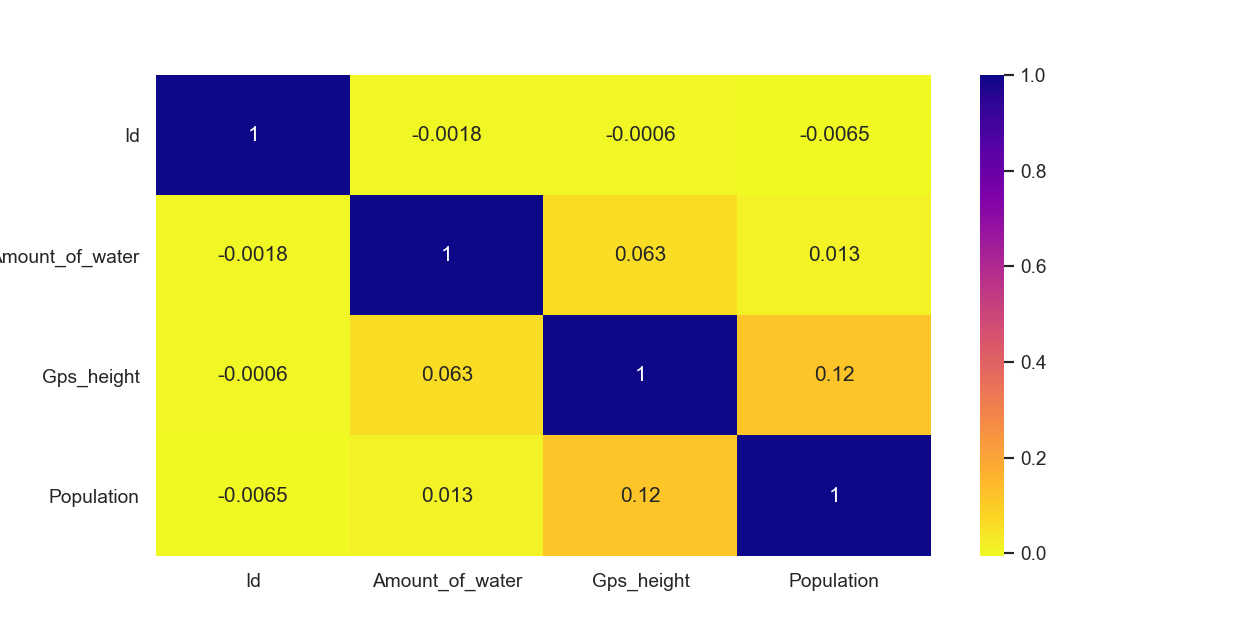

<AxesSubplot:>

In [145]:
plt.figure(figsize=(10,5))
sns.heatmap(test_data.corr(), annot= True, cmap="plasma_r")

BOX PLOT

<IPython.core.display.Javascript object>


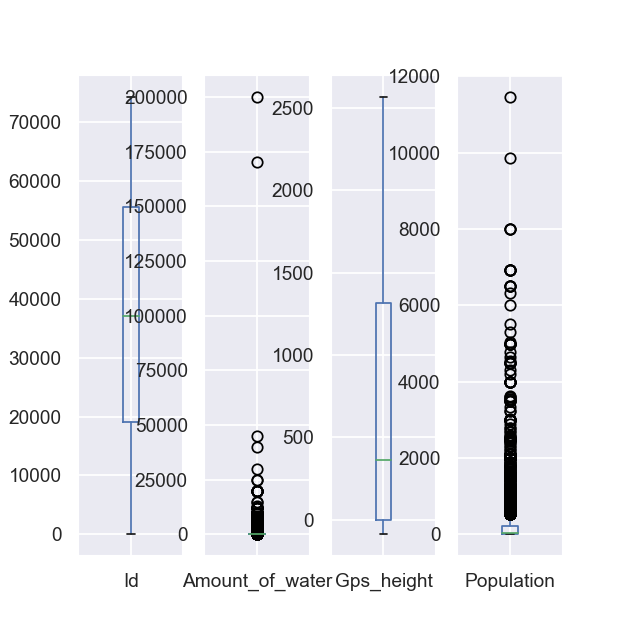

In [146]:
#to check outliers
test_data.plot(kind='box', subplots=True, sharex=False, sharey= False, figsize=(5,5))
plt.show()

IMPUTATION

In [147]:
cat_imp_test = SimpleImputer(strategy='most_frequent') #imputing the categorical values to mode or most_frequency.
test_data[categorical]=cat_imp_test.fit_transform(test_data[categorical])

In [148]:
test_data.isnull().sum()

Id                       0
Amount_of_water          0
Gps_height               0
Waterpoint_type          0
Basin_name               0
Village                  0
Regionname               0
Region_code              0
Wardname                 0
District_code            0
Population               0
Public_meeting           0
Organization_funding     0
Organization_surveyed    0
Scheme_management        0
SchemeName               0
Permit                   0
Company_installed        0
Management               0
Management_group         0
Extraction_type          0
Extraction_type_group    0
Extraction_type_class    0
Payment                  0
Payment_type             0
Water_quality            0
Quality_group            0
Quantity                 0
Quantity_group           0
Source                   0
Source_type              0
Source_class             0
Waterpoint_type_group    0
dtype: int64

DROP

In [149]:
test_data_d=test_data.drop(['Village','Id','Company_installed','Region_code','SchemeName','Wardname','Extraction_type','Payment','Quantity_group','Source','Organization_surveyed','Organization_funding'],axis=1)

In [150]:
num_col_test=test_data_d.select_dtypes(['float64','int64']).columns
num_col_test

Index(['Amount_of_water', 'Gps_height', 'Population'], dtype='object')

In [151]:
categorical=test_data_d.select_dtypes(include='object').columns #convert object to category
test_data_d[categorical]=test_data_d[categorical].astype('category')

In [152]:
cat_col_test=test_data_d.select_dtypes(['category']).columns
cat_col_test

Index(['Waterpoint_type', 'Basin_name', 'Regionname', 'District_code',
       'Scheme_management', 'Management', 'Management_group',
       'Extraction_type_group', 'Extraction_type_class', 'Payment_type',
       'Water_quality', 'Quality_group', 'Quantity', 'Source_type',
       'Source_class', 'Waterpoint_type_group'],
      dtype='object')

STANDARD SCALING

In [153]:
scaler=StandardScaler() 
scaler.fit(test_data_d[num_col_test])

StandardScaler()

In [154]:
test_data_scal =pd.DataFrame(scaler.transform(test_data_d[num_col_test]),columns=num_col_test)

In [155]:
test_data_scal

,Amount_of_water,Gps_height,Population
0,-0.103020,0.518828,-0.381911
1,-0.103020,-0.441125,-0.379817
2,0.075253,-0.573083,0.874972
3,-0.103020,0.787093,0.037050
4,-0.103020,-0.957354,-0.381911
...,...,...,...
11010,-0.103020,-0.957354,-0.381911
11011,-0.103020,1.084360,-0.381911
11012,-0.103020,-0.957354,-0.381911
11013,-0.103020,-0.957354,-0.381911


In [156]:
cat_col_test

Index(['Waterpoint_type', 'Basin_name', 'Regionname', 'District_code',
       'Scheme_management', 'Management', 'Management_group',
       'Extraction_type_group', 'Extraction_type_class', 'Payment_type',
       'Water_quality', 'Quality_group', 'Quantity', 'Source_type',
       'Source_class', 'Waterpoint_type_group'],
      dtype='object')

In [157]:
test_data_d.columns

Index(['Amount_of_water', 'Gps_height', 'Waterpoint_type', 'Basin_name',
       'Regionname', 'District_code', 'Population', 'Public_meeting',
       'Scheme_management', 'Permit', 'Management', 'Management_group',
       'Extraction_type_group', 'Extraction_type_class', 'Payment_type',
       'Water_quality', 'Quality_group', 'Quantity', 'Source_type',
       'Source_class', 'Waterpoint_type_group'],
      dtype='object')

ONE-HOT ENCODING

In [158]:
ohe =OneHotEncoder(handle_unknown='ignore') #onehotencoding
ohe.fit(test_data_d[cat_col_test])
test_cat_x=ohe.transform(test_data_d[cat_col_test])

In [159]:
columns_ohe_test=list(ohe.get_feature_names(cat_col_test))

In [160]:
print(columns_ohe)

['Waterpoint_type_cattle trough', 'Waterpoint_type_communal standpipe', 'Waterpoint_type_communal standpipe multiple', 'Waterpoint_type_dam', 'Waterpoint_type_hand pump', 'Waterpoint_type_improved spring', 'Waterpoint_type_other', 'Basin_name_basin1', 'Basin_name_basin2', 'Basin_name_basin3', 'Basin_name_basin4', 'Basin_name_basin5', 'Basin_name_basin6', 'Basin_name_basin7', 'Basin_name_basin8', 'Basin_name_basin9', 'Regionname_region1', 'Regionname_region10', 'Regionname_region11', 'Regionname_region12', 'Regionname_region13', 'Regionname_region14', 'Regionname_region15', 'Regionname_region16', 'Regionname_region17', 'Regionname_region18', 'Regionname_region19', 'Regionname_region2', 'Regionname_region20', 'Regionname_region21', 'Regionname_region3', 'Regionname_region4', 'Regionname_region5', 'Regionname_region6', 'Regionname_region7', 'Regionname_region8', 'Regionname_region9', 'District_code_0', 'District_code_1', 'District_code_2', 'District_code_3', 'District_code_4', 'District_c

In [161]:
print(columns_ohe_test)

['Waterpoint_type_cattle trough', 'Waterpoint_type_communal standpipe', 'Waterpoint_type_communal standpipe multiple', 'Waterpoint_type_hand pump', 'Waterpoint_type_improved spring', 'Waterpoint_type_other', 'Basin_name_basin1', 'Basin_name_basin2', 'Basin_name_basin3', 'Basin_name_basin4', 'Basin_name_basin5', 'Basin_name_basin6', 'Basin_name_basin7', 'Basin_name_basin8', 'Basin_name_basin9', 'Regionname_region1', 'Regionname_region10', 'Regionname_region11', 'Regionname_region12', 'Regionname_region13', 'Regionname_region14', 'Regionname_region15', 'Regionname_region16', 'Regionname_region17', 'Regionname_region18', 'Regionname_region19', 'Regionname_region2', 'Regionname_region20', 'Regionname_region21', 'Regionname_region3', 'Regionname_region4', 'Regionname_region5', 'Regionname_region6', 'Regionname_region7', 'Regionname_region8', 'Regionname_region9', 'District_code_0', 'District_code_1', 'District_code_2', 'District_code_3', 'District_code_4', 'District_code_5', 'District_code_

In [162]:
test_cat_x=ohe.transform(test_data_d[cat_col_test])

In [163]:
test_cat_x=pd.DataFrame(test_cat_x.todense(),columns=columns_ohe_test)

In [164]:
test_conc=pd.concat([test_data_scal,test_cat_x],axis=1)

In [165]:
test_conc.shape

(11015, 148)

Prediction

In [166]:
final_pred=rf.predict(test_conc)  #RF has the high score value so we took rf to predict in test dataset

In [167]:
final_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [169]:
final_pred.shape

(11015,)

In [170]:
final_pred=pd.DataFrame(final_pred) #converting Array to DataFrame

In [171]:
Final_pred=pd.concat([test_data['Id'],final_pred],axis=1).dropna() #Id and final predict is concated

In [172]:
Final_pred.head()

,Id,0
0,31547,0
1,34980,1
2,54744,1
3,20884,0
4,42440,1


In [173]:
Final_pred.rename(columns={0:'Status'},inplace=True) #final predict value is renamed as Status

In [ ]:
Final_pred